In [1]:
import numpy as np
import pandas as pd
import sklearn 
import pickle
import matplotlib.pyplot as plt
import cv2

In [2]:
# Load models
haar = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')  # Cascade classifier for face detection
model_svm = pickle.load(open('./model/model_svm.pickle', 'rb'))  # Machine learning model (SVM)
pca_models = pickle.load(open('./model/pca_dict.pickle', 'rb'))

In [3]:
pca_models

{'pca_50': PCA(n_components=50, whiten=True),
 'mean_face': array([0.36970707, 0.36609409, 0.36226628, ..., 0.3772225 , 0.37780782,
        0.37944727], shape=(10000,))}

In [4]:
model_pca =pca_models['pca_50']
mean_face_arr=pca_models['mean_face']

## Creat pipeline
- step 1 read image
- step 2 convert into gray scale
- step 3 crop the face(using haar cascase classifier)
- step 4 normalization
- step 5 resize images
- step 6 flatteining 
- step 7 substract with mean 
- step 8 get eigen image
- step 9 eigen image for visualization
- step 10 pass to ml models (svm) and get predictions
- step 11 : generate report

In [5]:
import cv2

In [6]:
img = cv2.imread('./test_images/getty_test.jpg')

In [7]:
import cv2
import os

# Define the path to the image
image_path = './test_images/t_image.jpg'

# Step 1: Check if the image file exists
if not os.path.exists(image_path):
    print(f"Error: The image file at {image_path} does not exist.")
else:
    # Step 2: Read image
    img = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error: Unable to load the image at {image_path}.")
    else:
        # Step 3: Convert the image into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Continue with the rest of your processing...


Error: The image file at ./test_images/t_image.jpg does not exist.


 # Create Pipeline

In [8]:
img =cv2.imread('./test_images/getty_test.jpg')
# step 02: convert image to grayscale
gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# step 03:crop the face (using haar cascase classifier)
faces = haar.detectMultiScale(gray, 1.5, 3)
for x,y,w,h in faces:
    #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi = gray[y:y+h,x:x+w]
    # step 04: Normalization (0-1)
    roi = roi/255.0
    # step 05: Resize the image (100,100)
    
    if roi.shape[1]>100:
        roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA)
    else:
        roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
    # step 06 : Flattening (1x10000)
    roi_reshape = roi_resize.reshape(1,10000)
    # step 07: substract with 
    roi_mean = roi_reshape-mean_face_arr
    # step 08: get eigen image (apply roi mean to pca)
    eigen_image = model_pca.transform(roi_mean) 

    eig_img = model_pca.inverse_transform(eigen_image)

   
    #step 10: pass to ml model (svm) and get predictions 
    results = model_svm.predict(eigen_image)
    prob_score = model_svm.predict_proba(eigen_image)  # Corrected method name
    prob_score_max = prob_score.max()


    # step -11: generate report
    text = "%s : %d"%(results[0],prob_score_max*100)
    print(text)
    print(results, prob_score)
    # defining color based on results 
    if results[0]=='male':
        color = (255,255,0)
    else:
        color = (255,0,255)
    cv2.rectangle(img,(x,y),(x+w,y+h),color,1)
    cv2.rectangle(img,(x,y-10),(x+w,y),color,-1)
    cv2.putText(img,text,(x,y),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),2)
    


    

male : 59
['male'] [[0.40066091 0.59933909]]
female : 81
['female'] [[0.81077975 0.18922025]]


In [9]:
# # # - step 1 read image
# img = cv2.imread('./test_images/getty_test.jpg')
# # - step 2 convert into gray scale
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# # - step 3 crop the face(using haar cascase classifier)
# faces = haar.detectMultiScale(gray, 1.5, 3)
# predictions = []
# for x, y, w, h in faces:
#     cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
#     face = gray[y:y+h, x:x+w]
#     roi =gray[y:y+h, x:x+w]
#     plt.imshow(roi,cmap='gray')
#     plt.show()
# # - step 4 normalization
#     roi = roi/255.0
# # - step 5 resize images(100,100)
#     if roi.shape[1]>100:
#         roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA)
#     else:
#         roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
    

#     # - # - step 6 flatteining 
#     roi_reshape = roi_resize.reshape(1, 10000)

#     # - step 7 substract with mean 
#     roi_mean = roi_reshape - mean_face_arr

#     # - step 8 get eigen image (apply PCA transformation)
#     eigen_image = model_pca.transform(roi_mean)  # Ensure this reduces to 50 features

#     # - step 10 pass to ml models (svm) and get predictions
#     results = model_svm.predict(eigen_image)
#     prob_score = model_svm.predict_proba(eigen_image)
#     prob_score_max=prob_score.max()  # Corrected method name
#     # - step 11 : generate report
#     text = "%s:%d"%(results[0],prob_score_max*100)
#     print(text)

# # - step 11 : generate report
#     if results[0]=='male':
#         color = (255,255,0)
#     else:
#         color = (255,0,255)
#     cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
#     cv2.rectangle(img, (x, y-15), (x+w, y), color, -1)
#     cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 2)

#     output={
#         'roi':roi,
#         'eig_img':eigen_image,
#         'prediction_name':results[0],
#         'score':prob_score_max
#     }
#     predictions.append(output)
      


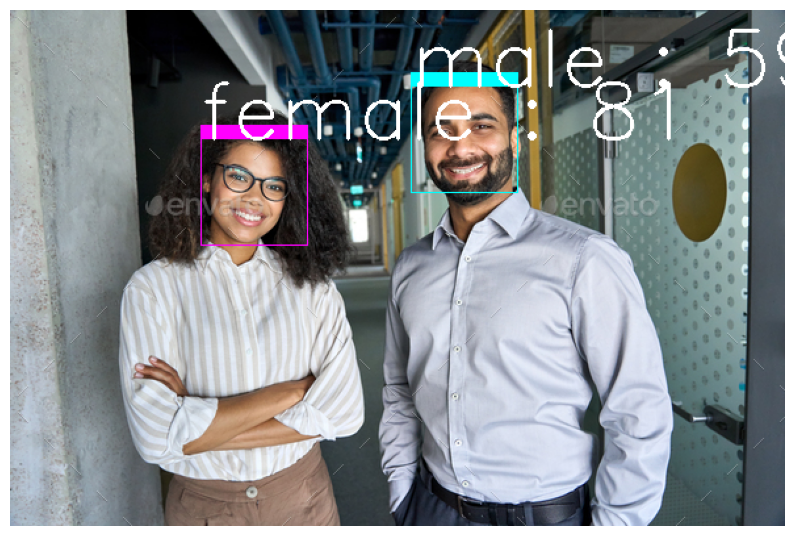

NameError: name 'predictions' is not defined

: 

In [10]:
img_rgb= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Generate report 
for i in range(len(predictions)):
    obj_gray =predictions[i]['roi']
    obj_eig = predictions[i]['eig_img'].reshape(5,10)
    plt.subplot(1,2,1)
    plt.imshow(obj_gray,cmap='gray')
    plt.title('Gray ScaleImage')
    plt.axis('off')

    # second 

    plt.subplot(1,2,2)
    plt.imshow(obj_eig,cmap='gray')
    plt.title('Eigen Image')
    plt.axis('off')
    plt.show()
    print('predicted gender = ',predictions[i]['prediction_name'])
    print('predicted Score={:0.2f}%'.format(predictions[i]['score']*100))


    print ('-'*50)

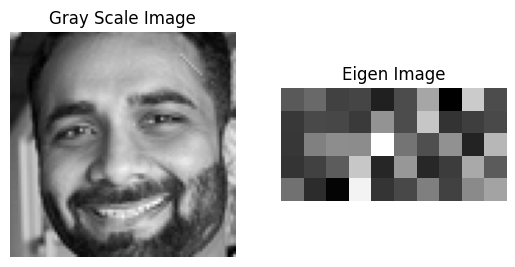

predicted gender =  male
predicted Score=59.93%
--------------------------------------------------


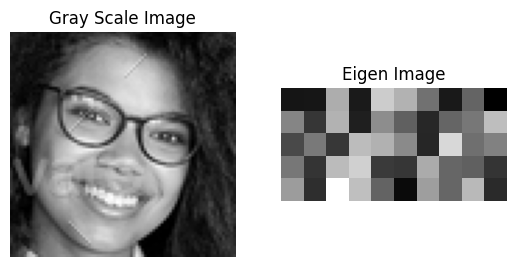

predicted gender =  female
predicted Score=81.08%
--------------------------------------------------


In [151]:
# Generate report 
for i in range(len(predictions)):
    obj_gray = predictions[i]['roi']
    # Fix the reshaping issue
    obj_eig = predictions[i]['eig_img'].reshape(5, 10)  # Adjust dimensions as needed
    plt.subplot(1, 2, 1)
    plt.imshow(obj_gray, cmap='gray')
    plt.title('Gray Scale Image')
    plt.axis('off')

    # Second 
    plt.subplot(1, 2, 2)
    plt.imshow(obj_eig, cmap='gray')
    plt.title('Eigen Image')
    plt.axis('off')
    plt.show()
    print('predicted gender = ', predictions[i]['prediction_name'])
    print('predicted Score={:0.2f}%'.format(predictions[i]['score'] * 100))

    print('-' * 50)

In [152]:
predictions

[{'roi': array([[0.74117647, 0.78431373, 0.80784314, ..., 0.45490196, 0.39607843,
          0.36470588],
         [0.64705882, 0.63137255, 0.6       , ..., 0.33333333, 0.29411765,
          0.27843137],
         [0.5254902 , 0.44313725, 0.2745098 , ..., 0.2745098 , 0.28627451,
          0.29019608],
         ...,
         [0.43921569, 0.45882353, 0.47843137, ..., 0.06666667, 0.05882353,
          0.        ],
         [0.44313725, 0.45098039, 0.4745098 , ..., 0.01568627, 0.00392157,
          0.16470588],
         [0.43921569, 0.45490196, 0.47058824, ..., 0.        , 0.1372549 ,
          0.69019608]], shape=(81, 81)),
  'eig_img': array([[-0.05299335,  0.2354078 , -0.55659066, -0.48290745, -1.20410353,
          -0.33830906,  1.45031644, -1.86320485,  2.17990981, -0.33049215,
          -0.71267216, -0.39637164, -0.44090587, -0.70713499,  1.10116317,
          -0.34683835,  2.09112512, -0.84117478, -0.62655994, -0.37415015,
          -0.76329691,  0.70272639,  0.95228122,  0.92715701, 